In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
from sklearn.linear_model import LogisticRegression
import sys

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Udacity Bookie

In [4]:
df_both_seasons = pd.read_pickle('df_both_seasons')

In [5]:
goals_list_h=(df_both_seasons.loc[df_both_seasons['HomeTeam']=='Leverkusen']['FTHG'].dropna().tolist() +
       df_both_seasons.loc[df_both_seasons['AwayTeam']=='Leverkusen']['FTAG'].dropna().tolist())
lam_h = np.mean(goals_list_h)

In [6]:
goals_list_a=(df_both_seasons.loc[df_both_seasons['HomeTeam']=='Hertha']['FTHG'].dropna().tolist() +
       df_both_seasons.loc[df_both_seasons['AwayTeam']=='Hertha']['FTAG'].dropna().tolist())
lam_a = np.mean(goals_list_a)

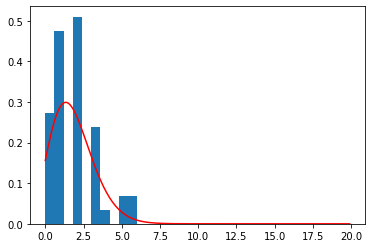

In [7]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

t = np.arange(0, 20, 0.1)
d = np.exp(-lam_h)*np.power(lam_h, t)/factorial(t)
plt.hist(goals_list_h, normed=True)
plt.plot(t, d, 'red')
plt.show()

In [8]:
goals_home=np.random.poisson(lam_h, 1000)

In [9]:
goals_away=np.random.poisson(lam_a, 1000)

In [10]:
np.where((goals_home - goals_away) == 0)[0].shape[0]

252

In [11]:
np.where((goals_home - goals_away) > 0)[0].shape[0]

462

In [12]:
np.where((goals_home - goals_away) < 0)[0].shape[0]

286

In [13]:
lam = (df_both_seasons['FTHG'][9:] + df_both_seasons['FTAG'][9:]).mean()

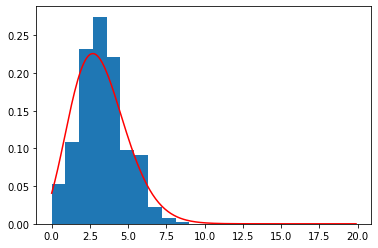

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

t = np.arange(0, 20, 0.1)
d = np.exp(-lam)*np.power(lam, t)/factorial(t)
plt.hist((df_both_seasons['FTHG'][9:] + df_both_seasons['FTAG'][9:]), normed=True)
plt.plot(t, d, 'red')
plt.show()

## Poisson Bookie

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

epl_1617 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/D1.csv")
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1617.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Bayern Munich,Hertha,2,2
1,Dortmund,Augsburg,5,1
2,Freiburg,Mainz,3,0
3,Leverkusen,Paderborn,3,2
4,Werder Bremen,Fortuna Dusseldorf,1,3


In [50]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()

HomeGoals    1.808
AwayGoals    1.472
dtype: float64

In [51]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

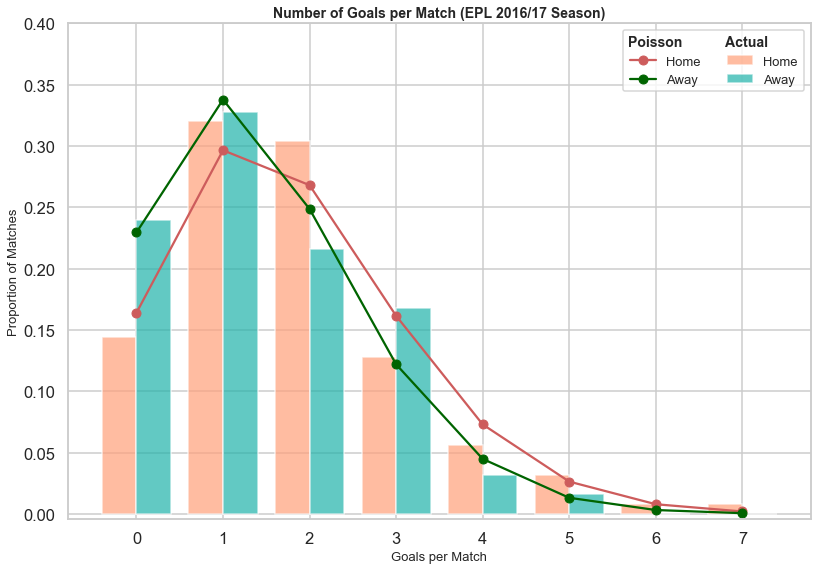

In [52]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, epl_1617.mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(epl_1617[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [53]:
poisson_pred

array([[0.16398177, 0.22946609],
       [0.29647904, 0.33777409],
       [0.26801706, 0.24860173],
       [0.16152495, 0.12198058],
       [0.07300928, 0.04488885],
       [0.02640015, 0.01321528],
       [0.00795525, 0.00324215],
       [0.00205473, 0.00068178]])

In [54]:
skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.22775704867909186

In [55]:
skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])

0.20891939457565387

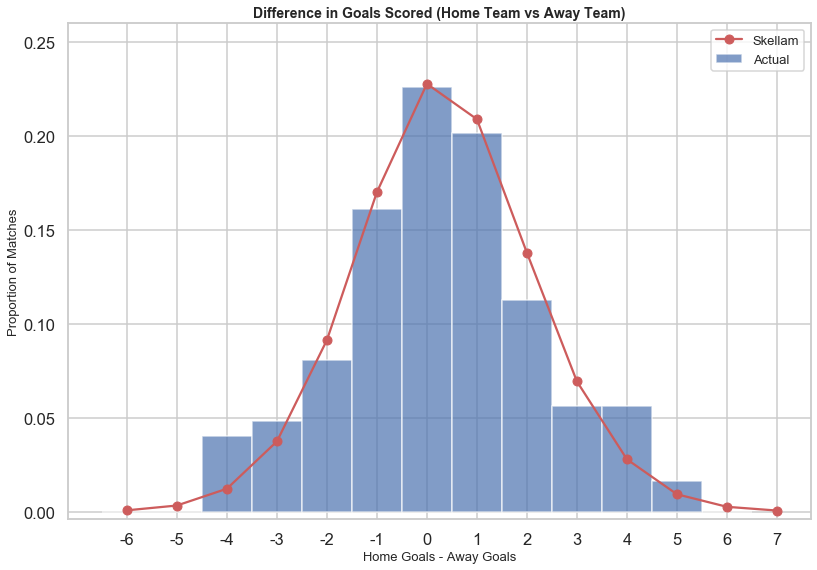

In [56]:
skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]

plt.hist(epl_1617[['HomeGoals']].values - epl_1617[['AwayGoals']].values, range(-6,8), 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [57]:
chel_home.index-0.4

Float64Index([2.6, 3.6, 1.6, 0.6, 4.6], dtype='float64')

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  250
Model:                            GLM   Df Residuals:                      214
Model Family:                 Poisson   Df Model:                           35
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -363.84
Date:                Thu, 19 Dec 2019   Deviance:                       220.69
Time:                        10:57:48   Pearson chi2:                     187.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.4112      0.309      1.331      0.183      -0.194       1.017
team[T.Bayern Munich]              0.5167      0.283      1.824      0.068      -0.038       1.072
team[T.Dortmund]                   0.4961      0.286      1.737      0.082      -0.064       1.056
team[T.Ein Frankfurt]              0.1951      0.306      0.637      0.524      -0.405       0.795
team[T.FC Koln]                   -0.4983      0.368     -1.354      0.176      -1.219       0.223
team[T.Fortuna Dusseldorf]        -0.2242      0.336     -0.667      0.505      -0.883       0.435
team[T.Freiburg]                   0.1513      0.306      0.495      0.621      -0.448       0.751
team[T.Hertha]                    -0.0322      0.319     -0.101      0.920      -0.658       0.594
team[T.Hoffenheim]                -0.0819      0.322     -0.255      0.799      -0.713       0.549
team[T.Leverkusen]                 0.1335      0.313      0.427      0.670      -0.480       0.747
team[T.M'gladbach]                 0.3950      0.292      1.352      0.176      -0.178       0.968
team[T.Mainz]                      0.0368      0.319      0.115      0.908      -0.589       0.663
team[T.Paderborn]                 -0.1491      0.339     -0.440      0.660      -0.814       0.516
team[T.RB Leipzig]                 0.6594      0.276      2.390      0.017       0.119       1.200
team[T.Schalke 04]                 0.1461      0.303      0.483      0.629      -0.447       0.739
team[T.Union Berlin]              -0.0859      0.327     -0.263      0.792      -0.726       0.554
team[T.Werder Bremen]              0.2787      0.314      0.887      0.375      -0.337       0.894
team[T.Wolfsburg]                 -0.3712      0.344     -1.079      0.280      -1.045       0.303
opponent[T.Bayern Munich]         -0.2578      0.301     -0.856      0.392      -0.848       0.333
opponent[T.Dortmund]              -0.2605      0.303     -0.858      0.391      -0.855       0.334
opponent[T.Ein Frankfurt]         -0.2109      0.293     -0.720      0.471      -0.785       0.363
opponent[T.FC Koln]                0.1063      0.272      0.391      0.696      -0.426       0.639
opponent[T.Fortuna Dusseldorf]     0.0910      0.271      0.336      0.737      -0.440       0.622
opponent[T.Freiburg]              -0.4033      0.315     -1.281      0.200      -1.021       0.214
opponent[T.Hertha]                 0.1036      0.274      0.378      0.705      -0.433       0.640
opponent[T.Hoffenheim]            -0.1372      0.288     -0.476      0.634      -0.702       0.428
opponent[T.Leverkusen]            -0.4113      0.309     -1.330      0.184      -1.018       0.195
opponent[T.M'gladbach]            -0.5079      0.321     -1.583      0.113      -1.136       0.121
opponent[T.Mai

In [76]:
poisson_model.predict(pd.DataFrame(data={'team': 'Hertha', 'opponent': "M'gladbach",
                                       'home':1},index=[1]))

1    1.031634
dtype: float64

In [77]:
poisson_model.predict(pd.DataFrame(data={'team': "M'gladbach", 'opponent': 'Hertha',
                                       'home':0},index=[1]))

1    2.483922
dtype: float64

In [78]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Hertha', "M'gladbach", max_goals=3)

array([[0.02973126, 0.07385015, 0.09171902, 0.07594098],
       [0.03067177, 0.0761863 , 0.09462044, 0.07834328],
       [0.01582102, 0.03929818, 0.04880682, 0.04041078],
       [0.0054405 , 0.01351378, 0.01678359, 0.01389638]])

In [80]:
hertha_gladbach = simulate_match(poisson_model, "Hertha", "M'gladbach", max_goals=10)
# chelsea win
np.sum(np.tril(hertha_gladbach, -1))

0.13810209814049967

In [81]:
np.sum(np.diag(hertha_gladbach))

0.17109159597519696

In [82]:
np.sum(np.triu(hertha_gladbach, 1))

0.6907480510059774

In [83]:
epl_1617_halves = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/D1.csv")
epl_1617_halves = epl_1617_halves[['FTHG', 'FTAG', 'HTHG', 'HTAG']]
epl_1617_halves['FHgoals'] = epl_1617_halves['HTHG'] + epl_1617_halves['HTAG']
epl_1617_halves['SHgoals'] = epl_1617_halves['FTHG'] + epl_1617_halves['FTAG'] - epl_1617_halves['FHgoals']
epl_1617_halves = epl_1617_halves[['FHgoals', 'SHgoals']]
epl_1617_halves.mean()

FHgoals    1.466667
SHgoals    1.792593
dtype: float64

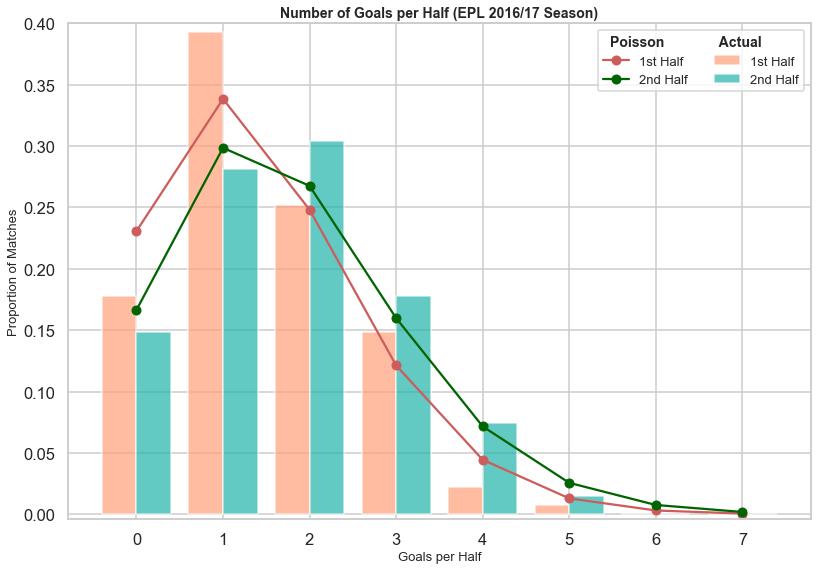

In [86]:
poisson_halves_pred = np.column_stack([[poisson.pmf(i, epl_1617_halves.mean()[j]) for i in range(8)] for j in range(2)])

plt.hist(epl_1617_halves.values, range(9), 
         alpha=0.7, label=['1st Half', '2nd Half'],normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_halves_pred[:,0],
                  linestyle='-', marker='o',label="1st Half", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_halves_pred[:,1],
                  linestyle='-', marker='o',label="2nd Half", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson              Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Half",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Half (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()